In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data_withComGID.csv")

/var/folders/8t/0q92bs3s4pxc4tyvrgk1v07w0000gn/T/ipykernel_1750/2858966193.py:6: DtypeWarning:

Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.



In [14]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
 13  CompanyGroupID     318477 non-null  object
 14  State              318477 non-null  object
dtypes: int64(2), object(13)
memory usage: 36.4+ MB


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,CompanyGroupID,State
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,Aldi Stores,NSW
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,Aldi Stores,Unknown
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,LB Creative Pty Ltd,QLD
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,Anaconda Group Pty Ltd,NSW
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,Commonwealth Bank - Business & Private Banking,NSW


In [18]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
CompanyGroupID            0
State                     0
dtype: int64


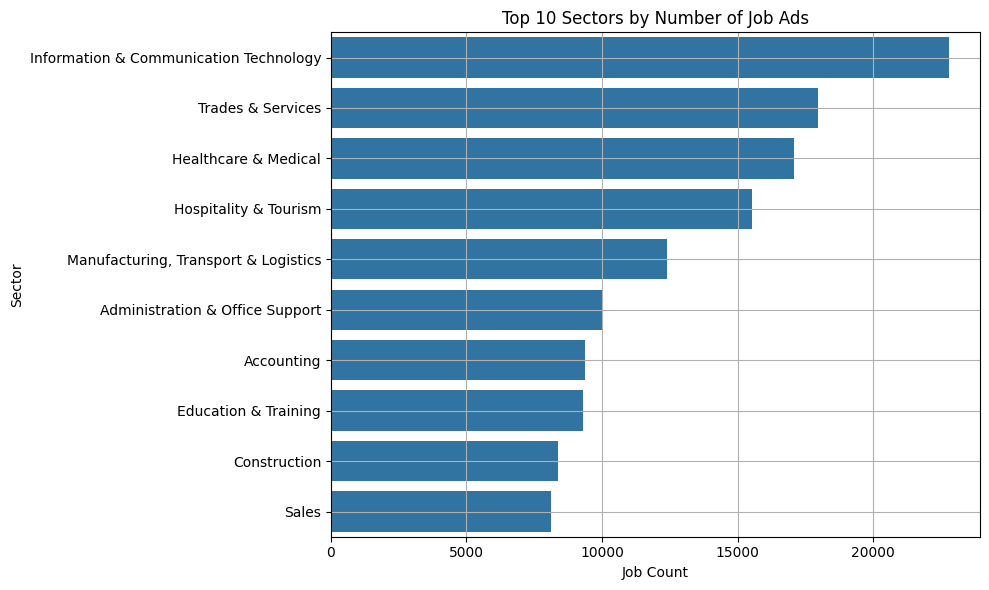

In [16]:
sector_counts = df['Classification'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=sector_counts.index, x=sector_counts.values)
plt.title('Top 10 Sectors by Number of Job Ads')
plt.xlabel('Job Count')
plt.ylabel('Sector')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
subsector_counts = df.groupby(['Classification', 'SubClassification']).size().reset_index(name='Count')
top_subsectors = subsector_counts.sort_values(['Classification', 'Count'], ascending=[True, False])

# Show top 3 subsectors for each sector
top_spotlights = top_subsectors.groupby('Classification').head(3)
top_spotlights


,Classification,SubClassification,Count
12,Accounting,Financial Accounting & Reporting,1183
8,Accounting,Business Services & Corporate Advisory,1104
0,Accounting,Accounts Officers/Clerks,929
25,Administration & Office Support,Administrative Assistants,4572
32,Administration & Office Support,Receptionists,1297
...,...,...,...
371,Sport & Recreation,Other,221
368,Sport & Recreation,Coaching & Instruction,179
373,Trades & Services,Automotive Trades,3262
379,Trades & Services,Electricians,1783


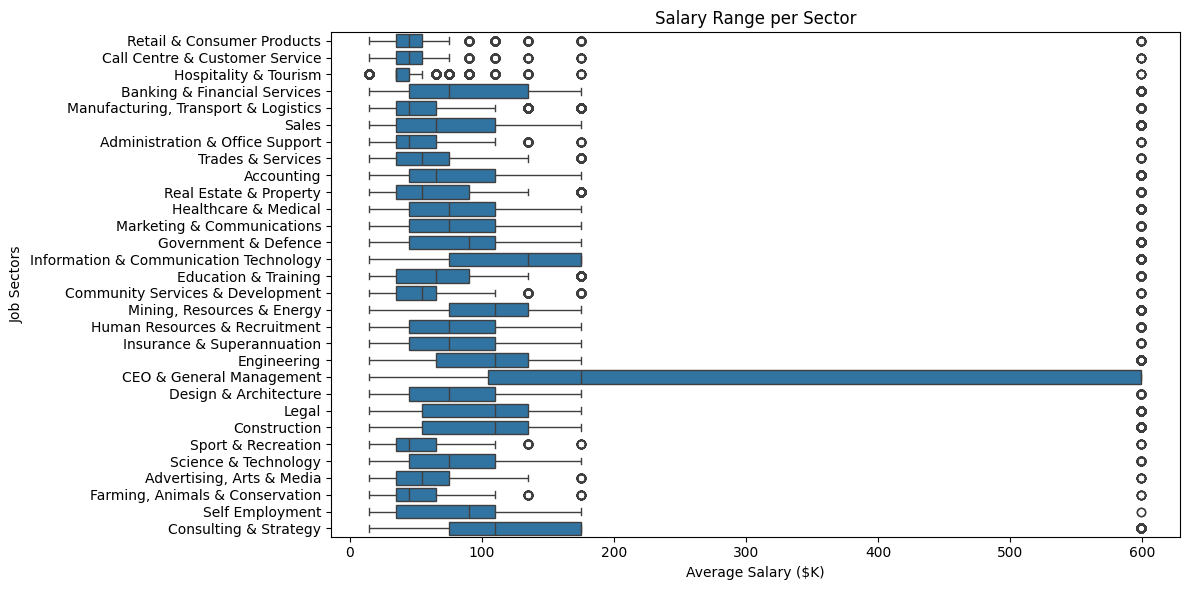

In [32]:
df['AvgSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# Group by sector
salary_sector = df.groupby('Classification')['AvgSalary'].agg(['mean', 'min', 'max']).sort_values(by='mean', ascending=False)
salary_sector.head(10)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Classification', x='AvgSalary', orient='h')
plt.title("Salary Range per Sector")
plt.xlabel("Average Salary ($K)")
plt.ylabel("Job Sectors")
plt.tight_layout()
plt.show()


In [58]:
import pandas as pd

# STEP 1: Create AvgSalary column
df['AvgSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# STEP 2: Remove rows with missing Classification or unknown State
df_sector = df[
    df['Classification'].notna() & 
    df['State'].notna() & 
    (df['State'] != 'Unknown')
].copy()

# STEP 3: Group by State + Sector and aggregate job count and average salary
state_sector_summary = (
    df_sector.groupby(['State', 'Classification'])
    .agg(
        JobCount=('Id', 'count'),
        AvgSalary=('AvgSalary', 'mean')
    )
    .reset_index()
)

# STEP 4: Add ranking within each state
state_sector_summary['DemandRank'] = (
    state_sector_summary.groupby('State')['JobCount']
    .rank(method='dense', ascending=False)
)

state_sector_summary['SalaryRank'] = (
    state_sector_summary.groupby('State')['AvgSalary']
    .rank(method='dense', ascending=False)
)

# Optional: Combine into a single composite score
state_sector_summary['Score'] = (
    state_sector_summary['DemandRank'] + state_sector_summary['SalaryRank']
)

# STEP 5: Select top 3 sectors per state based on combined score
top_recommendations = (
    state_sector_summary
    .sort_values(by=['State', 'Score'])
    .groupby('State')
    .head(3)
    .sort_values(by=['State', 'Score'])
)

# STEP 6: Display results
print("Top 3 Recommended Sectors per State:")
display(top_recommendations)

# STEP 7: Save to CSV for external use
top_recommendations.to_csv("top_sector_recommendations.csv", index=False)
print("✅ File saved as 'top_sector_recommendations.csv'")


Top 3 Recommended Sectors per State:


,State,Classification,JobCount,AvgSalary,DemandRank,SalaryRank,Score
17,NSW,Information & Communication Technology,9825,187.098015,1.0,2.0,3.0
14,NSW,Healthcare & Medical,5129,112.948333,4.0,9.0,13.0
7,NSW,Construction,3410,137.970674,9.0,5.0,14.0
44,NT,Healthcare & Medical,249,147.630522,1.0,3.0,4.0
52,NT,"Mining, Resources & Energy",133,140.409774,4.0,4.0,8.0
43,NT,Government & Defence,163,117.269939,3.0,6.0,9.0
76,QLD,Information & Communication Technology,2974,184.489240,3.0,2.0,5.0
73,QLD,Healthcare & Medical,3446,125.911056,2.0,5.0,7.0
81,QLD,"Mining, Resources & Energy",1446,138.161480,8.0,3.0,11.0
103,SA,Healthcare & Medical,836,121.568780,2.0,3.0,5.0


✅ File saved as 'top_sector_recommendations.csv'


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Fill missing Requirement with empty string
df['Requirement'] = df['Requirement'].fillna('')

# Step 2: Filter only rows with valid Classification
df_req = df[df['Classification'].notna()].copy()

# Step 3: Grouped keyword extraction function
def get_top_keywords_per_sector(df, sector_col='Classification', text_col='Requirement', top_n=15):
    sector_keywords = {}
    sectors = df[sector_col].unique()

    for sector in sectors:
        sector_df = df[df[sector_col] == sector]
        texts = sector_df[text_col].tolist()

        if not texts:
            continue

        vectorizer = CountVectorizer(stop_words='english', max_features=1000)
        X = vectorizer.fit_transform(texts)

        word_counts = X.sum(axis=0).A1
        words = vectorizer.get_feature_names_out()
        word_freq = pd.Series(word_counts, index=words).sort_values(ascending=False).head(top_n)

        sector_keywords[sector] = word_freq

    return sector_keywords

# Step 4: Run it and get top skills per sector
top_keywords_by_sector = get_top_keywords_per_sector(df_req)

# # Optional: Display example sector
# example_sector = 'Information & Communication Technology'
# print(f"\nTop keywords in: {example_sector}")
# print(top_keywords_by_sector.get(example_sector, "No data found."))

In [68]:
# Flatten into a DataFrame
skills_data = []
for sector, keywords in top_keywords_by_sector.items():
    for word, count in keywords.items():
        skills_data.append({'Sector': sector, 'Keyword': word, 'Count': count})

df_sector_skills = pd.DataFrame(skills_data)

# Sort by sector then count
df_sector_skills = df_sector_skills.sort_values(by=['Sector', 'Count'], ascending=[True, False])

# Show
display(df_sector_skills.head(50))  # show top 50 rows for preview


,Sector,Keyword,Count
120,Accounting,join,2464
121,Accounting,opportunity,2373
122,Accounting,team,2324
123,Accounting,business,1736
124,Accounting,role,1663
125,Accounting,accountant,1534
126,Accounting,finance,1409
127,Accounting,financial,1208
128,Accounting,accounts,1168
129,Accounting,experienced,1150


In [70]:
df_sector_skills.to_csv("top_keywords_per_sector.csv", index=False)
print("✅ Saved as 'top_keywords_per_sector.csv'")

✅ Saved as 'top_keywords_per_sector.csv'


In [72]:
# Loop through sorted sector names
for sector in sorted(top_keywords_by_sector.keys()):
    print(f"\n🔹 {sector}")
    print("----------------------------")
    
    # Get top keywords (already sorted by count in your code)
    keywords = top_keywords_by_sector[sector]
    
    # Print each keyword and its frequency
    for word, count in keywords.items():
        print(f"{word:<15} {count}")


🔹 Accounting
----------------------------
join            2464
opportunity     2373
team            2324
business        1736
role            1663
accountant      1534
finance         1409
financial       1208
accounts        1168
experienced     1150
firm            1128
looking         1062
officer         1031
work            959
seeking         924

🔹 Administration & Office Support
----------------------------
team            2760
join            2273
opportunity     1976
administration  1781
support         1627
role            1610
seeking         1513
office          1441
assistant       1334
looking         1321
experienced     1310
time            1163
administrator   1070
service         1058
work            978

🔹 Advertising, Arts & Media
----------------------------
join            186
team            183
looking         150
media           144
opportunity     139
digital         131
agency          116
seeking         93
role            92
work            90
manager    

In [74]:
!pip install plotly

In [76]:
import plotly.express as px
import pandas as pd

In [86]:
import plotly.express as px
import pandas as pd
from ipywidgets import interact

# Ensure you have a clean DataFrame
df['AvgSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2
df_filtered = df[df['Classification'].notna() & df['State'].notna()]

# Create interactive widget to select state
@interact(state=df_filtered['State'].unique())
def visualize_by_state(state):
    data = df_filtered[df_filtered['State'] == state]
    sector_summary = (
        data.groupby('Classification')
        .agg(JobCount=('Id', 'count'), AvgSalary=('AvgSalary', 'mean'))
        .reset_index()
        .sort_values(by='JobCount', ascending=False)
    )
    
    fig1 = px.bar(sector_summary, x='JobCount', y='Classification', orientation='h',
                  title=f'Number of Jobs by Sector in {state}')
    fig1.show()
    
    fig2 = px.bar(sector_summary, x='AvgSalary', y='Classification', orientation='h',
                  title=f'Average Salary by Sector in {state}')
    fig2.show()

interactive(children=(Dropdown(description='state', options=('NSW', 'Unknown', 'QLD', 'SA', 'VIC', 'WA', 'NT',…

In [88]:
!pip install plotly wordcloud ipywidgets

In [92]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [104]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [106]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # <- Modern gensim version
pyLDAvis.enable_notebook()

In [117]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import re
from tqdm.notebook import tqdm

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Fill NaN
df['Requirement'] = df['Requirement'].fillna('')
df['State'] = df['State'].fillna('Unknown')
df['Classification'] = df['Classification'].fillna('Unknown')

# Tokenization setup
tqdm.pandas()
stop_words = set(stopwords.words('english'))

def fast_tokenize(text):
    words = word_tokenize(re.sub(r'[^a-zA-Z]', ' ', text))
    return [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]

df['clean_tokens'] = df['Requirement'].progress_apply(fast_tokenize)

# Dropdown widgets
state_dropdown = widgets.Dropdown(
    options=sorted(df['State'].unique()),
    description='State:'
)
sector_dropdown = widgets.Dropdown(
    options=sorted(df['Classification'].unique()),
    description='Sector:'
)

# Callback to update visualisation
def update_topic(state, sector):
    subset = df[(df['State'] == state) & (df['Classification'] == sector)]
    
    if subset.empty:
        print("❌ No data for this selection.")
        return
    
    # Token list
    texts = subset['clean_tokens'].tolist()
    dictionary = Dictionary(texts)
    dictionary.filter_extremes(no_below=3, no_above=0.9)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # LDA
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=5, random_state=42)
    
    # Show pyLDAvis
    vis = gensimvis.prepare(lda, corpus, dictionary)
    display(vis)
    
    # Salary chart
    subset['AvgSalary'] = (subset['LowestSalary'] + subset['HighestSalary']) / 2
    fig = px.histogram(subset, x='AvgSalary', nbins=20, title=f'Average Salary: {sector} in {state}')
    fig.show()

# Create interactive UI
widgets.interact(update_topic, state=state_dropdown, sector=sector_dropdown)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chanutdamanosorn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanutdamanosorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/318477 [00:00<?, ?it/s]

interactive(children=(Dropdown(description='State:', options=('NSW', 'NT', 'QLD', 'SA', 'TAS', 'Unknown', 'VIC…

<function __main__.update_topic(state, sector)>

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import re
from tqdm.notebook import tqdm

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Fill NaN
df['Requirement'] = df['Requirement'].fillna('')
df['State'] = df['State'].fillna('Unknown')
df['Classification'] = df['Classification'].fillna('Unknown')

# Tokenization setup
tqdm.pandas()
stop_words = set(stopwords.words('english'))

def fast_tokenize(text):
    words = word_tokenize(re.sub(r'[^a-zA-Z]', ' ', text))
    return [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]

df['clean_tokens'] = df['Requirement'].progress_apply(fast_tokenize)

# Dropdown widgets
state_dropdown = widgets.Dropdown(
    options=sorted(df['State'].unique()),
    description='State:'
)
sector_dropdown = widgets.Dropdown(
    options=sorted(df['Classification'].unique()),
    description='Sector:'
)

# Callback to update visualisation
def update_topic(state, sector):
    subset = df[(df['State'] == state) & (df['Classification'] == sector)]
    
    if subset.empty:
        print("❌ No data for this selection.")
        return
    
    # Token list
    texts = subset['clean_tokens'].tolist()
    dictionary = Dictionary(texts)
    dictionary.filter_extremes(no_below=3, no_above=0.9)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # LDA
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=5, random_state=42)
    
    # Show pyLDAvis
    vis = gensimvis.prepare(lda, corpus, dictionary)
    display(vis)
    
    # Salary chart
    subset['AvgSalary'] = (subset['LowestSalary'] + subset['HighestSalary']) / 2
    fig = px.histogram(subset, x='AvgSalary', nbins=20, title=f'Average Salary: {sector} in {state}')
    fig.show()

# Create interactive UI
widgets.interact(update_topic, state=state_dropdown, sector=sector_dropdown)


In [127]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import re
from tqdm.notebook import tqdm

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Fill NaN
df['Requirement'] = df['Requirement'].fillna('')
df['State'] = df['State'].fillna('Unknown')
df['Classification'] = df['Classification'].fillna('Unknown')

# Tokenization setup
tqdm.pandas()
stop_words = set(stopwords.words('english'))

def fast_tokenize(text):
    words = word_tokenize(re.sub(r'[^a-zA-Z]', ' ', text))
    return [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]

df['clean_tokens'] = df['Requirement'].progress_apply(fast_tokenize)

# Dropdown widgets
state_dropdown = widgets.Dropdown(
    options=sorted(df['State'].unique()),
    description='State:'
)
sector_dropdown = widgets.Dropdown(
    options=sorted(df['Classification'].unique()),
    description='Sector:'
)

# Callback to update visualisation
def update_topic(state, sector):
    subset = df[(df['Classification'] == sector)]  # filter by sector only for job count

    if subset.empty:
        print("❌ No data for this selection.")
        return
    
    job_count = subset[subset['State'] == state].shape[0]
    print(f"Number of job ads in sector '{sector}' in state '{state}': {job_count}")


    # ✅ Then refine to specific state for LDA & Salary
    subset_state = subset[subset['State'] == state]
    if subset_state.empty:
        print("❌ No data for this state + sector combination.")
        return

    # Token list
    texts = subset_state['clean_tokens'].tolist()
    dictionary = Dictionary(texts)
    dictionary.filter_extremes(no_below=3, no_above=0.9)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # LDA
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=5, random_state=42)
    
    # Show pyLDAvis
    vis = gensimvis.prepare(lda, corpus, dictionary)
    display(vis)

    # ✅ Salary Histogram
    subset_state['AvgSalary'] = (subset_state['LowestSalary'] + subset_state['HighestSalary']) / 2
    fig_salary = px.histogram(subset_state, x='AvgSalary', nbins=20,
                              title=f'Average Salary: {sector} in {state}')
    fig_salary.show()

# Create interactive UI
widgets.interact(update_topic, state=state_dropdown, sector=sector_dropdown)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chanutdamanosorn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanutdamanosorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/318477 [00:00<?, ?it/s]

interactive(children=(Dropdown(description='State:', options=('NSW', 'NT', 'QLD', 'SA', 'TAS', 'Unknown', 'VIC…

<function __main__.update_topic(state, sector)>

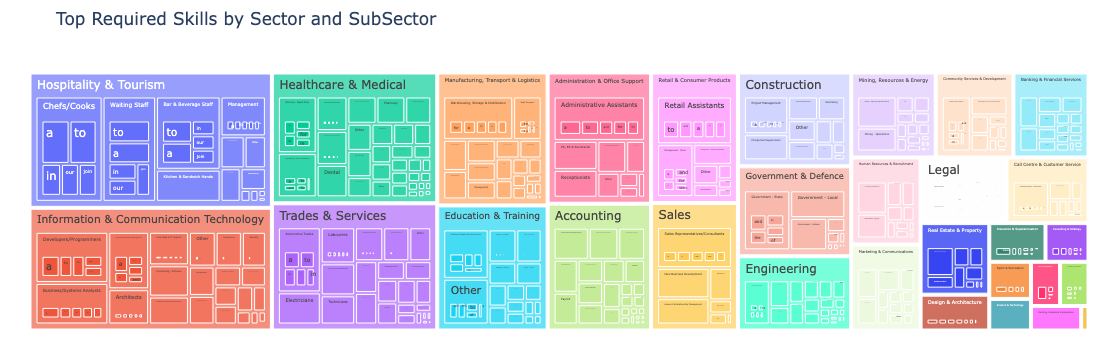

In [121]:
import plotly.express as px
from collections import Counter

records = []

grouped = df[['Classification', 'SubClassification', 'Requirement']].dropna().groupby(['Classification', 'SubClassification'])

for (sector, subsector), group in grouped:
    text = " ".join(group['Requirement'].astype(str).values).lower()
    word_counts = Counter(text.split())
    for word, count in word_counts.most_common(5):
        records.append({
            'Sector': sector,
            'SubSector': subsector,
            'Skill': word,
            'Count': count
        })
skill_df = pd.DataFrame(records)

fig = px.treemap(skill_df,
                 path=['Sector', 'SubSector', 'Skill'],
                 values='Count',
                 title='Top Required Skills by Sector and SubSector')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()
